# First Deep Learning Project
##Fashion Classification


In [ ]:
'''
class_labels:

0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot 

Classify the given input from above class using Neural Network

image shape 28 X 28 pixel ( Gray scale)

'''

'\nclass_labels:\n\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot \n\nClassify the given input from above class using Neural Network\n\nimage shape 28 X 28 pixel ( Gray scale)\n\n'

### Import Libraries

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data(C:\Users\EASY\AppData\Local\Programs\Python\Python310\Lib\site-packages\keras\datasets)

In [2]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [15]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

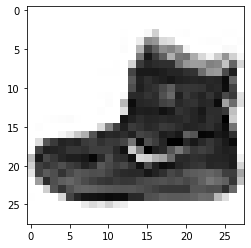

In [10]:
plt.imshow(X_train[0], cmap ="Greys")

NameError: name 'class_labels' is not defined

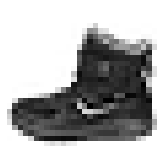

In [9]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

# Feature Scalling

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build Neural Network

In [21]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]), #vector convert(input data)
                         keras.layers.Dense(units=32, activation='relu'),
# fst hidden layers units= features activations=relu always return positive value
                         keras.layers.Dense(units=10, activation='softmax') # output units = 10 types of shirt softmax=probability 
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [24]:
#dofferent different optimizer use like gradient descent,adam ,  loss= error  
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=1) # epochs = how many times train our model 

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2773 - accuracy: 0.8974


In [27]:
model.fit(X_train, y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3805 - accuracy: 0.8638
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3554 - accuracy: 0.8706
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3406 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3266 - accuracy: 0.8828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3181 - accuracy: 0.8841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3085 - accuracy: 0.8872
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3010 - accuracy: 0.8905
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8932
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2870 - accuracy: 0.8945
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.284

## Test and Evaluate Neural Network Model

In [37]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8685


[0.37854132056236267, 0.8684999942779541]

In [38]:
y_pred = model.predict(X_test)

In [39]:
#y_pred[0]
y_pred[0].round(2)  # last output 0.96

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.96],
      dtype=float32)

In [40]:
#convert into index 
np.argmax(y_pred[0].round(2))

9

In [ ]:
  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

In [41]:
#Actual value 
y_test[0]

9

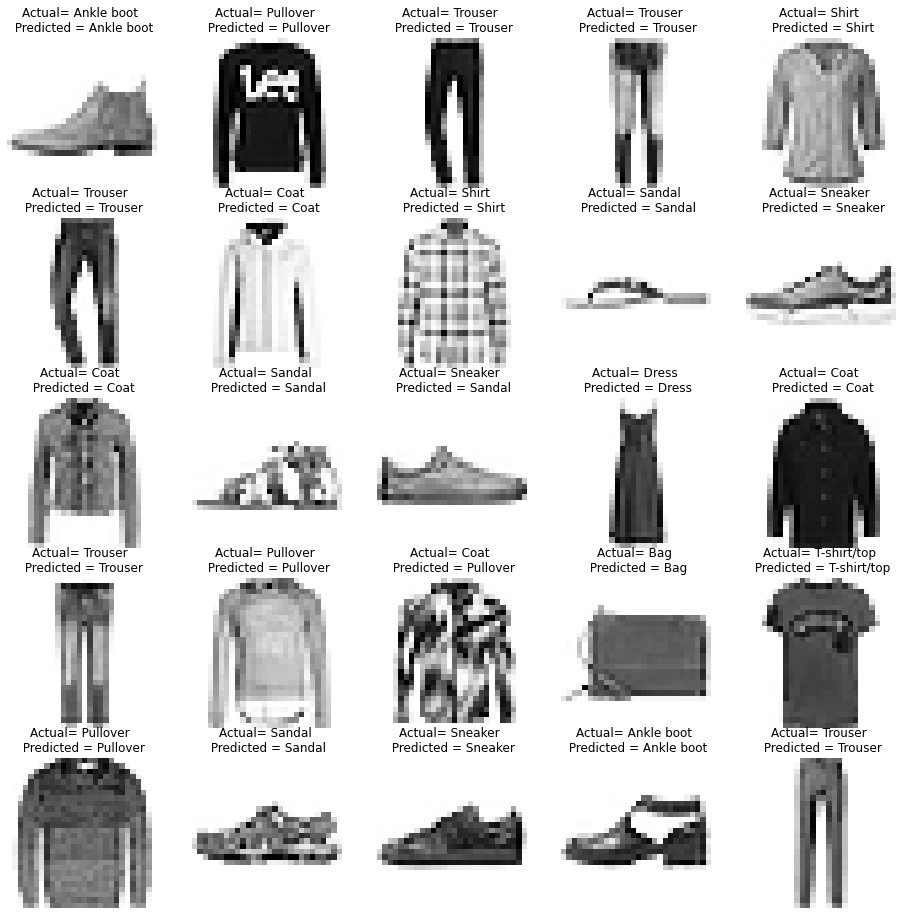

In [42]:
#Actual value & predict value find 
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

## Save Model

In [ ]:
model.save("MNIST_classifier_nn_model.h5")

In [ ]:
model = keras.models.load_model("MNIST_classifier_nn_model.h5")

In [ ]:
model.predict(X_test)

array([[9.10135259e-06, 9.65295899e-12, 6.94351286e-07, ...,
        4.69467491e-02, 1.92902342e-03, 9.08391953e-01],
       [5.93830409e-05, 2.09886816e-10, 9.89905775e-01, ...,
        2.48206748e-26, 1.36228451e-07, 1.97702867e-18],
       [3.96420182e-06, 9.99994874e-01, 7.87193471e-07, ...,
        1.63497307e-21, 2.80775764e-10, 6.25224598e-17],
       ...,
       [3.45216156e-03, 1.74534467e-08, 1.46937254e-03, ...,
        2.98453351e-08, 9.93241191e-01, 2.66846811e-09],
       [1.34630181e-05, 9.98262703e-01, 1.16234537e-06, ...,
        4.71984465e-11, 6.38421724e-08, 2.50701930e-08],
       [6.47966135e-06, 2.74615580e-10, 7.86619239e-06, ...,
        8.83071334e-04, 1.03327329e-03, 1.11307985e-04]], dtype=float32)